In [ ]:
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.1 MB/s eta 0:00:00


In [ ]:
!pip install roboflow -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 75.5 MB/s eta 0:00:00


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="H8DbCiR7ptPHkuPAE8BF")
project = rf.workspace("deeplearning-bjbks").project("yolotest2-jttig")
version = project.version(1)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to yolotest2-1 in yolov9:: 100%|██████████| 5168/5168 [00:02<00:00, 1795.39it/s]


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov9c-seg.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 53.9M/53.9M [00:02<00:00, 27.8MB/s]


In [ ]:
!yolo task=segment mode=train model=/content/yolov9c-seg.pt data=/content/yolotest2-1/data.yaml epochs=50 imgsz=640

Ultralytics 8.3.97 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=/content/yolov9c-seg.pt, data=/content/yolotest2-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

In [ ]:
!pip install supervision -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 7.3 MB/s eta 0:00:00


In [ ]:
import supervision as sv
from ultralytics import YOLO

model = YOLO(f'/content/runs/segment/train2/weights/best.pt')

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=f"/content/yolotest2-1/valid/images",
    annotations_directory_path=f"/content/yolotest2-1/valid/labels",
    data_yaml_path=f"/content/yolotest2-1/data.yaml"
)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.
SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.



0: 640x640 1 Daun Bercak, 62.3ms
Speed: 4.9ms preprocess, 62.3ms inference, 184.6ms postprocess per image at shape (1, 3, 640, 640)


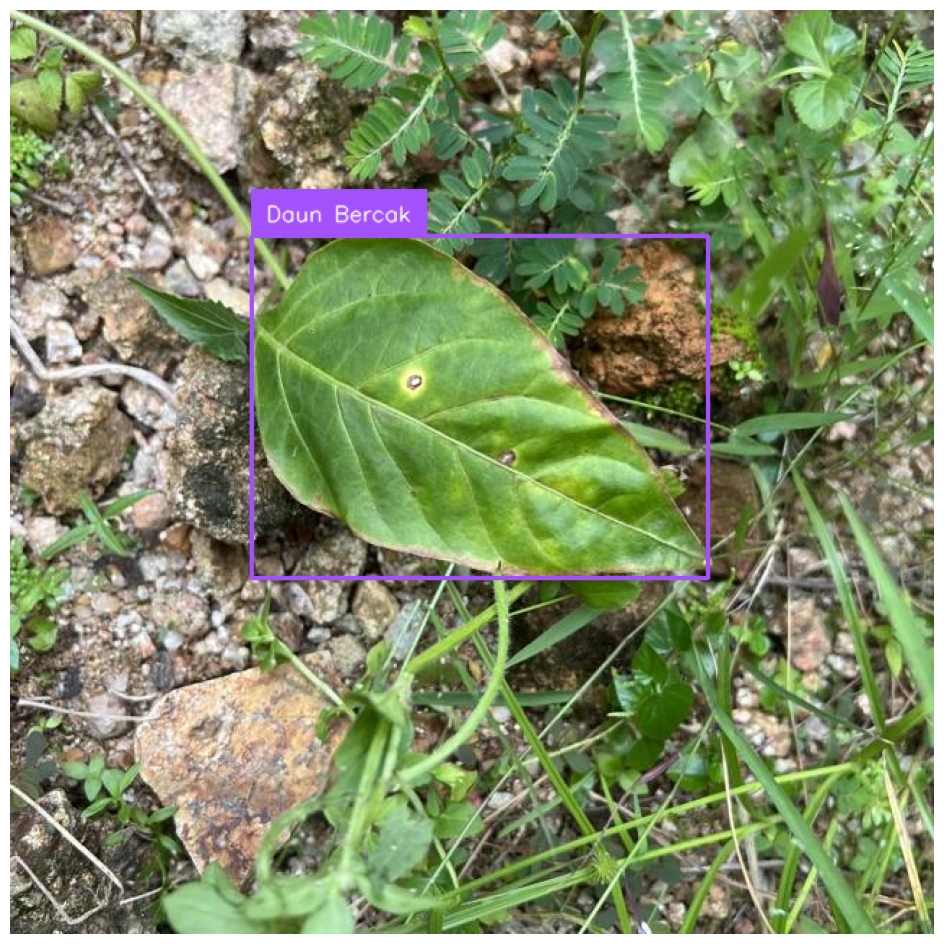

In [ ]:
import random

random_image = random.choice(list(dataset.images.keys()))
random_image = dataset.images[random_image]

results = model(source=random_image, conf=0.7)[0]
detections = sv.Detections.from_ultralytics(results)

annotated_image = bounding_box_annotator.annotate(
    scene=random_image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [ ]:
from ultralytics import YOLO

# Load a pretrained YOLO11n model
model = YOLO("/content/runs/segment/train2/weights/best.pt")

# Run inference on 'bus.jpg' with arguments
model.predict("/content/IMG_0138.png", save=True, imgsz=640, conf=0.65)


image 1/1 /content/IMG_0138.png: 640x640 1 Daun Bercak, 50.6ms
Speed: 2.9ms preprocess, 50.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'Daun Bercak', 1: 'Daun Keriting', 2: 'Daun Kuning'}
 obb: None
 orig_img: array([[[132, 195, 145],
         [133, 195, 146],
         [132, 195, 145],
         ...,
         [117, 111, 112],
         [115, 109, 110],
         [114, 108, 109]],
 
        [[129, 192, 143],
         [130, 193, 144],
         [130, 194, 145],
         ...,
         [119, 113, 114],
         [116, 110, 111],
         [113, 108, 109]],
 
        [[126, 191, 143],
         [125, 191, 141],
         [126, 192, 142],
         ...,
         [119, 113, 114],
         [116, 110, 111],
         [114, 108, 109]],
 
        ...,
 
        [[ 32,  35,  39],
         [ 31,  34,  38],
         [ 27,  30,  34],
         ...,
         [118, 209, 170],
         [115, 206, 167],
         [113, 203, 165]],
 
        [[ 31,  34,  38],
      

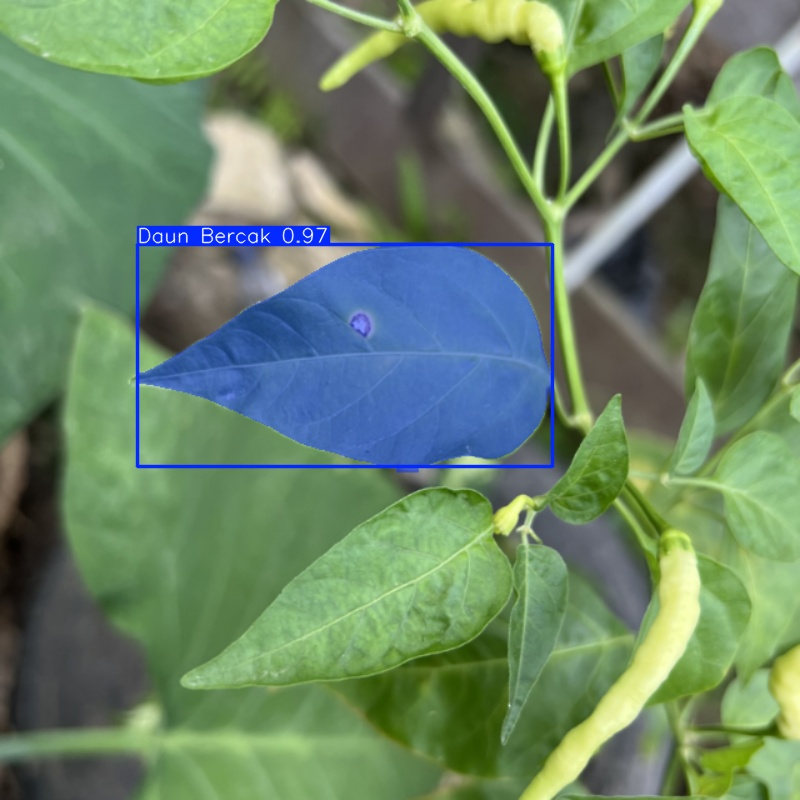

In [ ]:
from IPython.display import Image
Image(filename='/content/runs/segment/predict/IMG_0138.jpg', height=600)

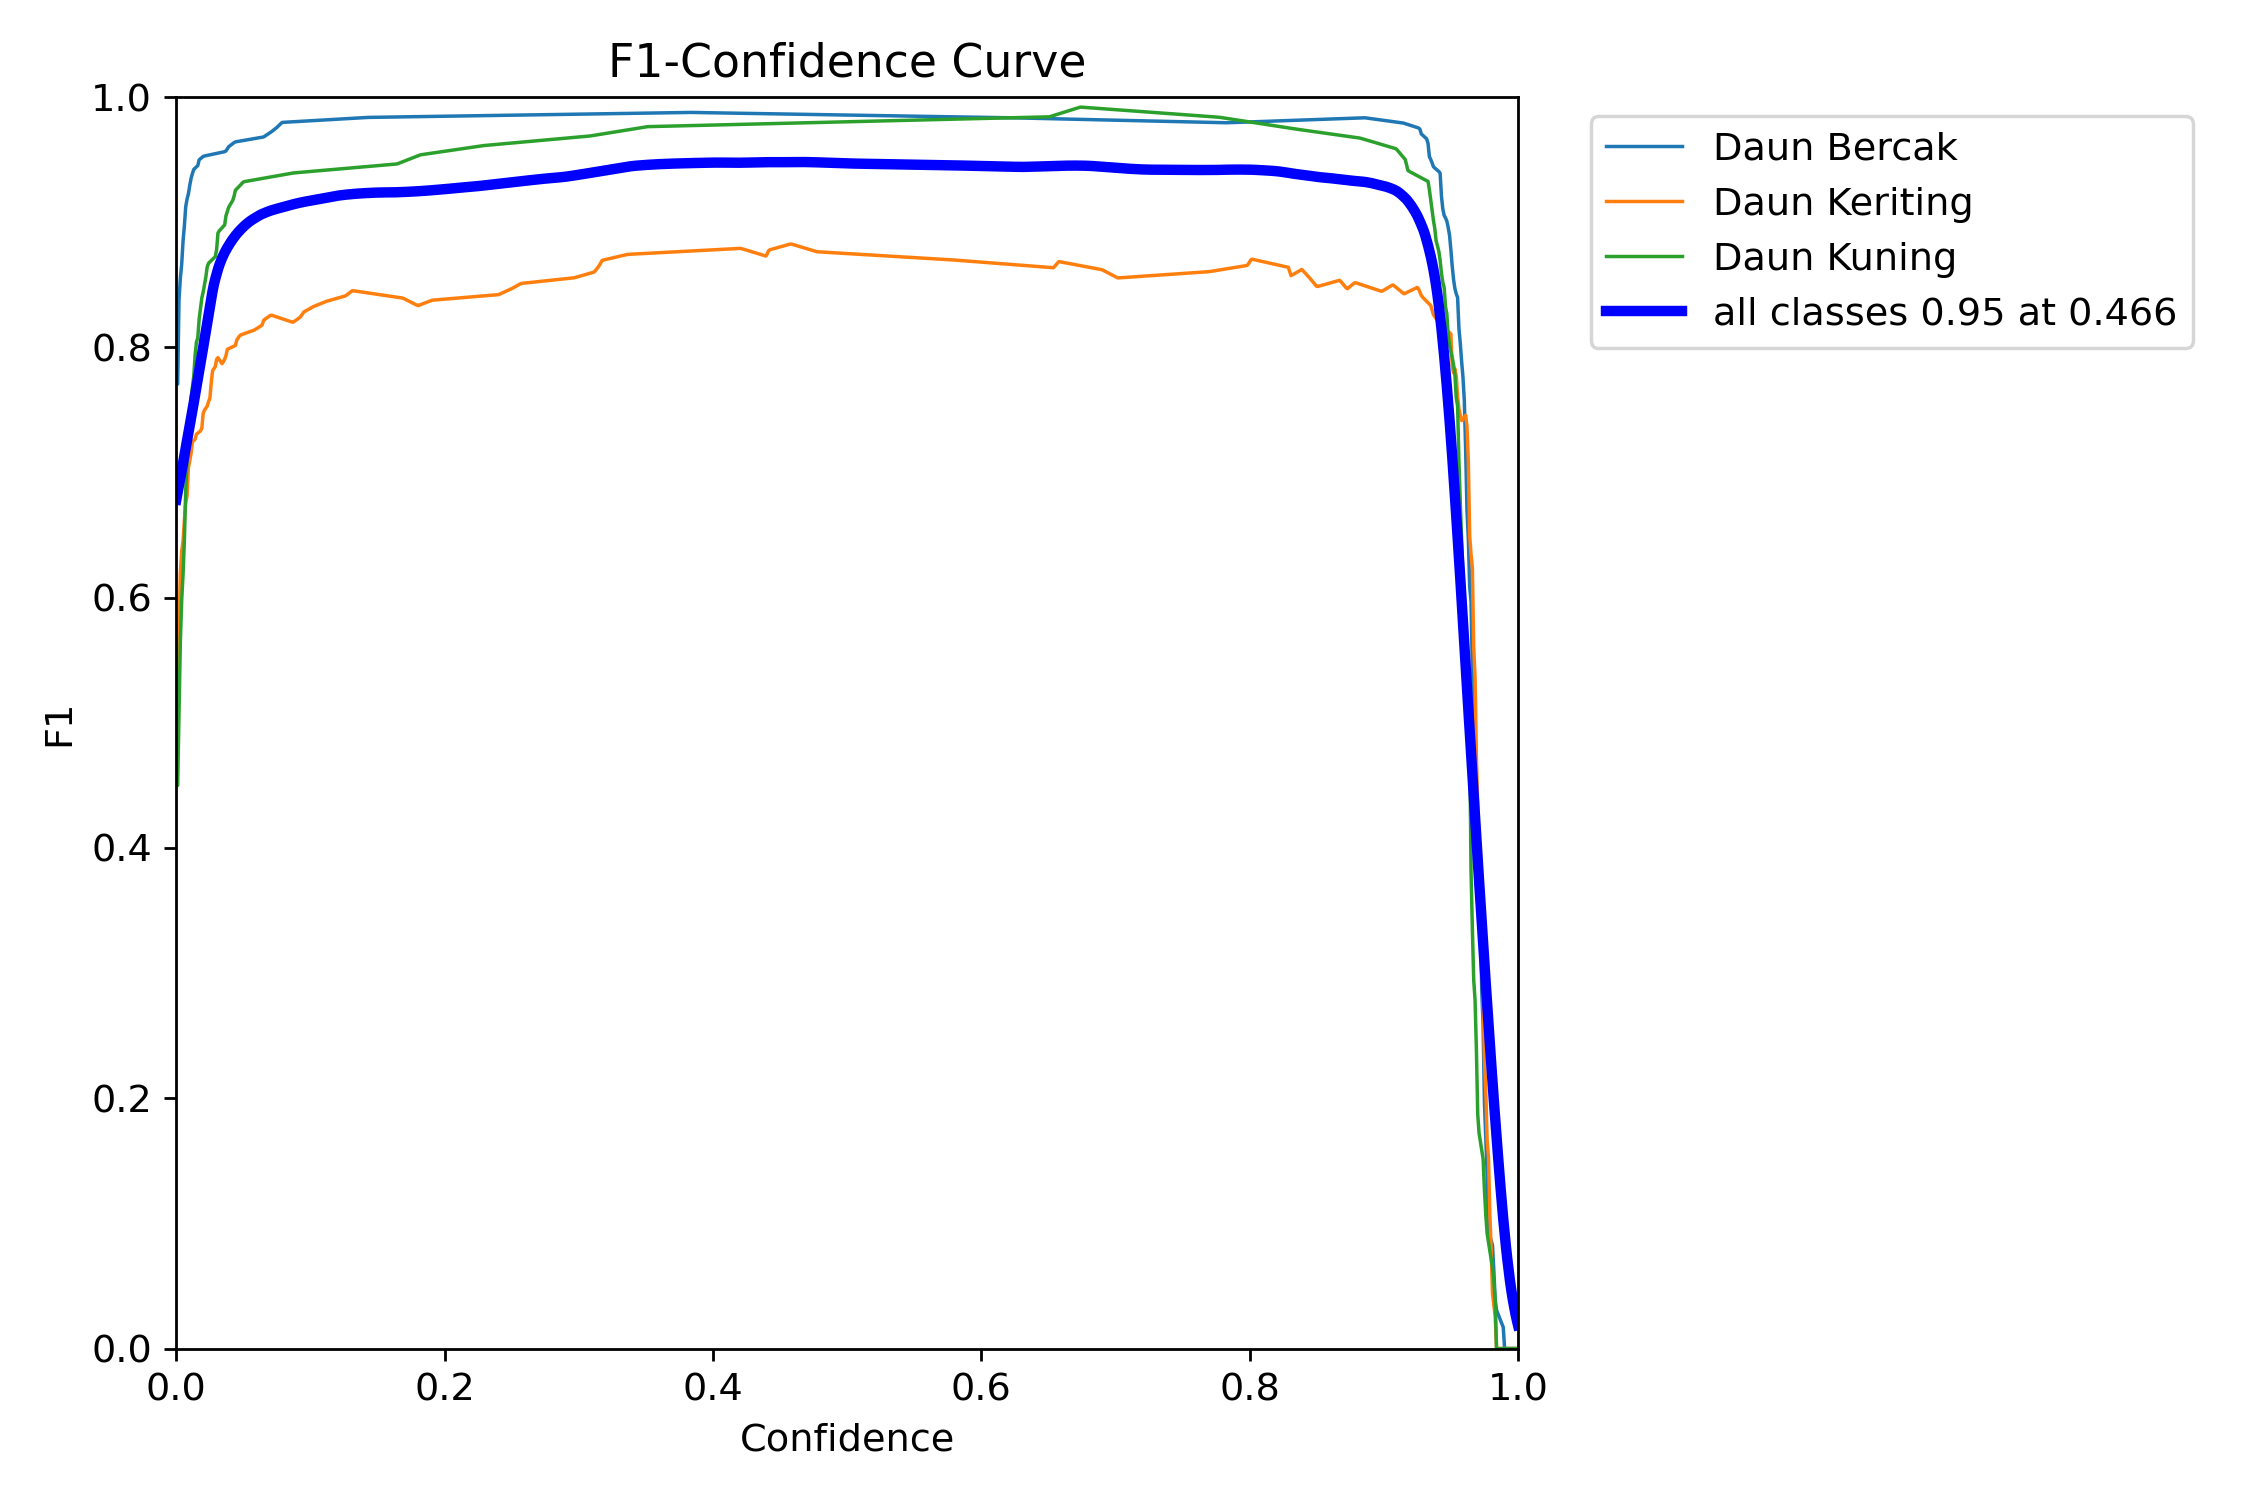

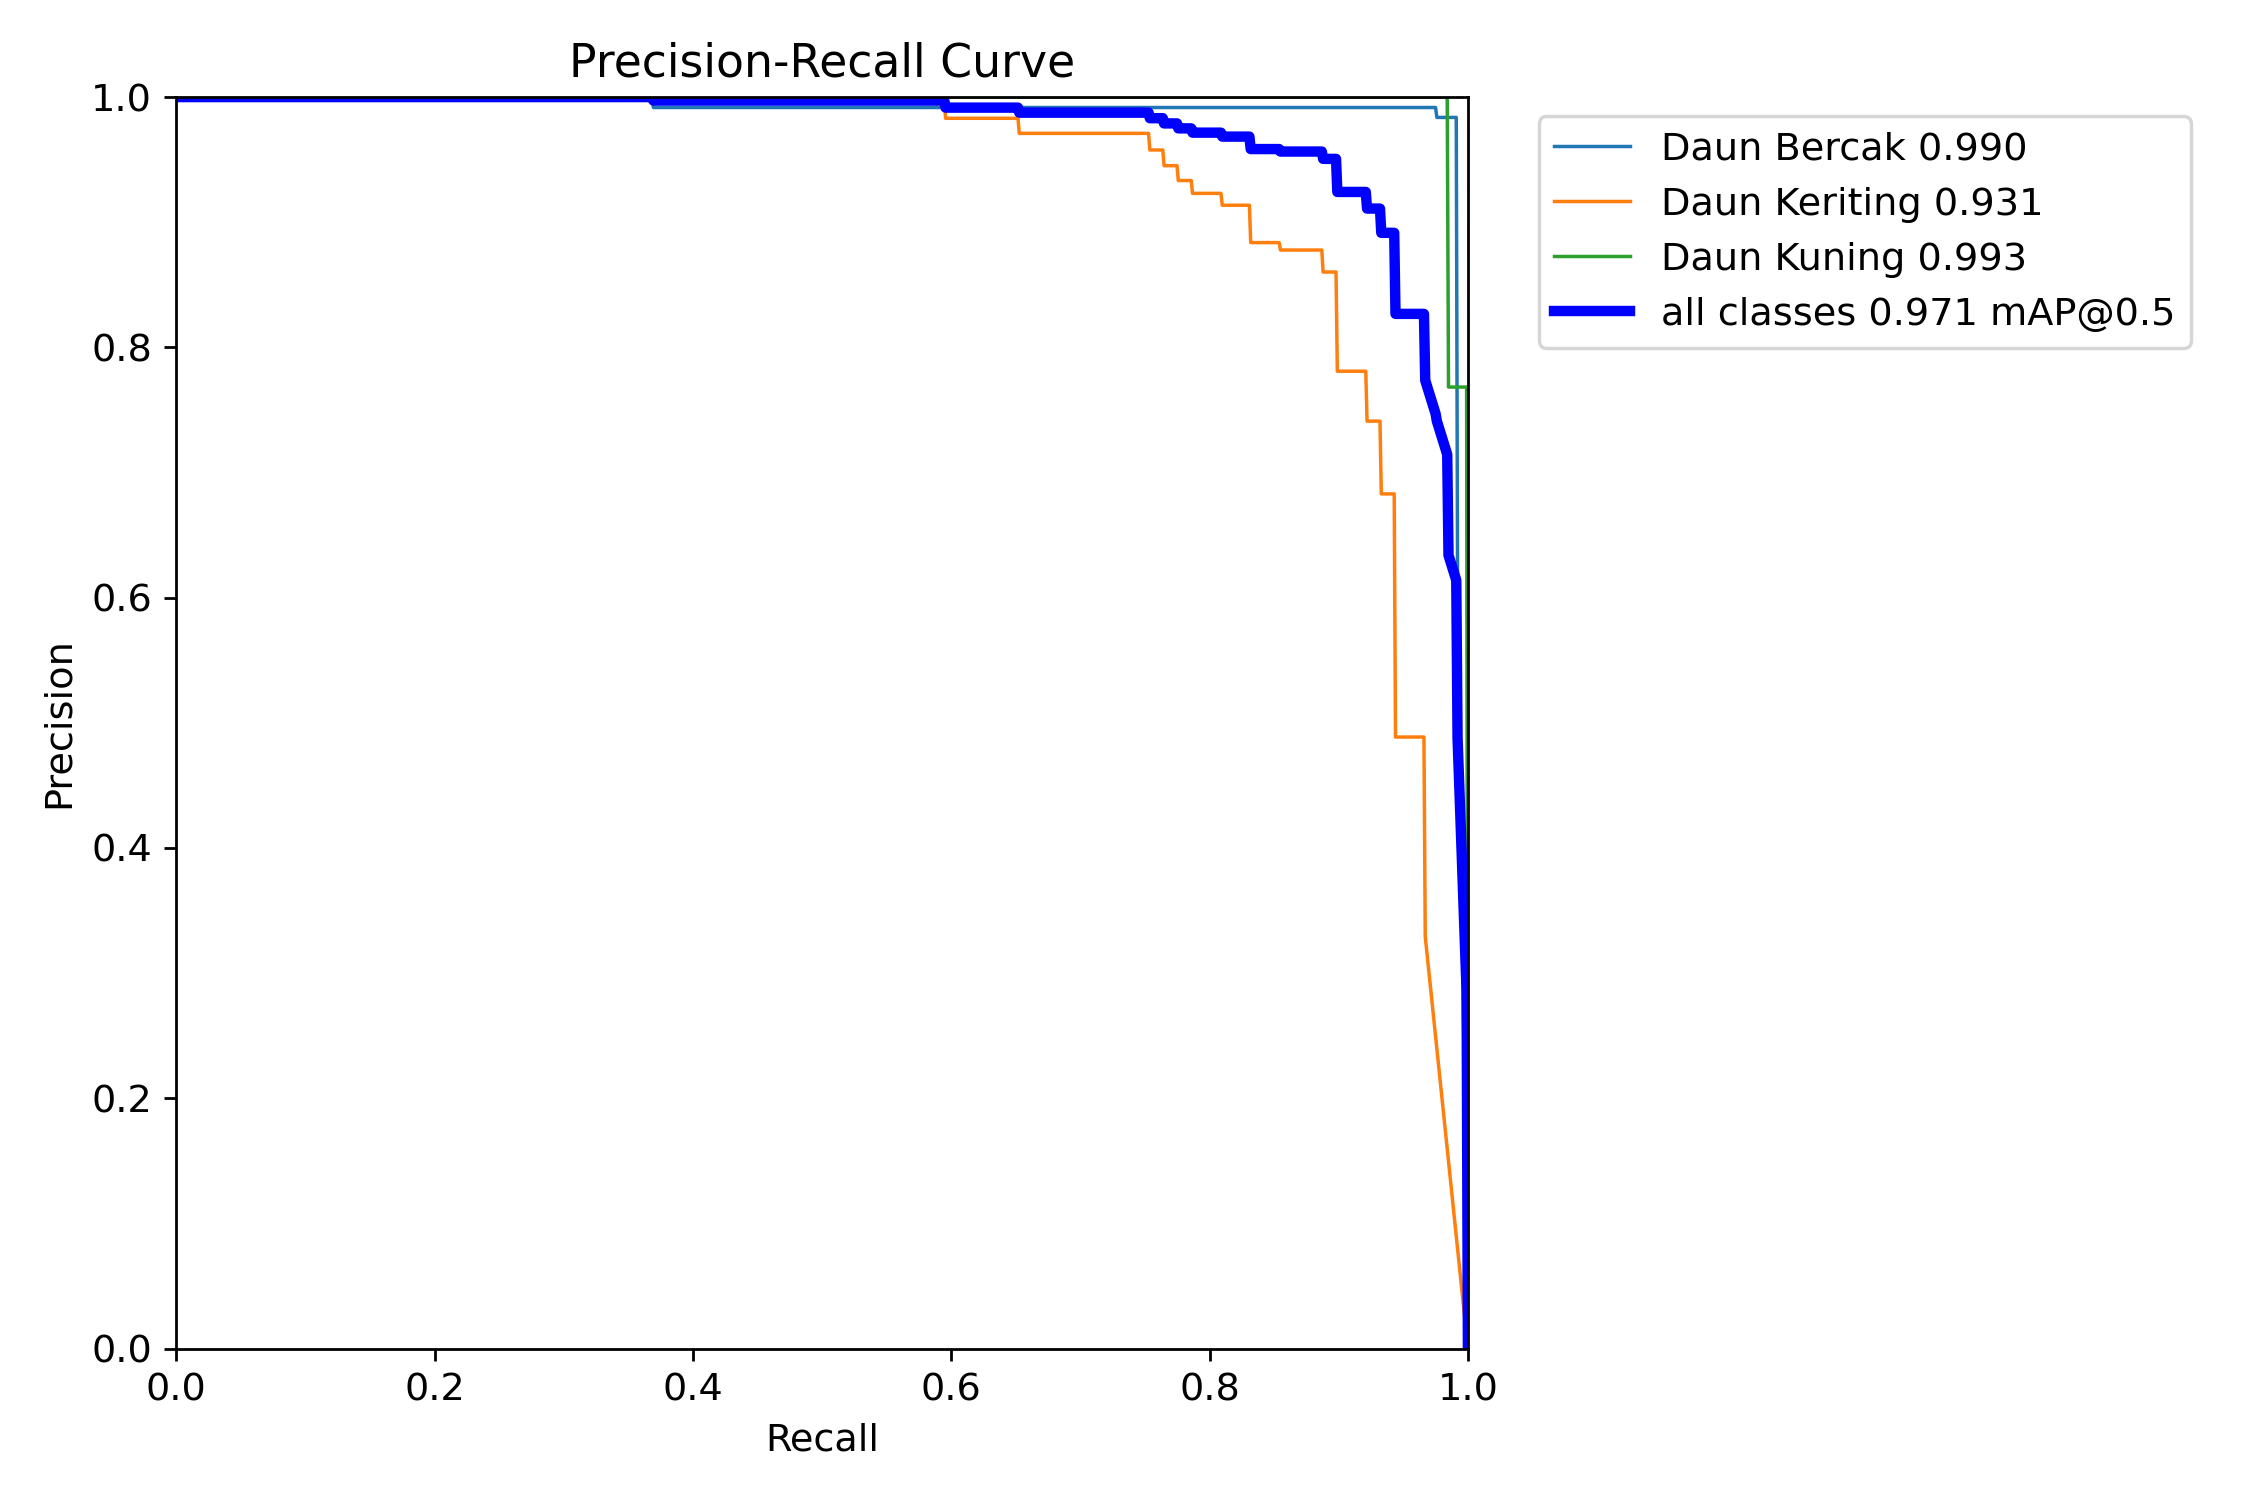

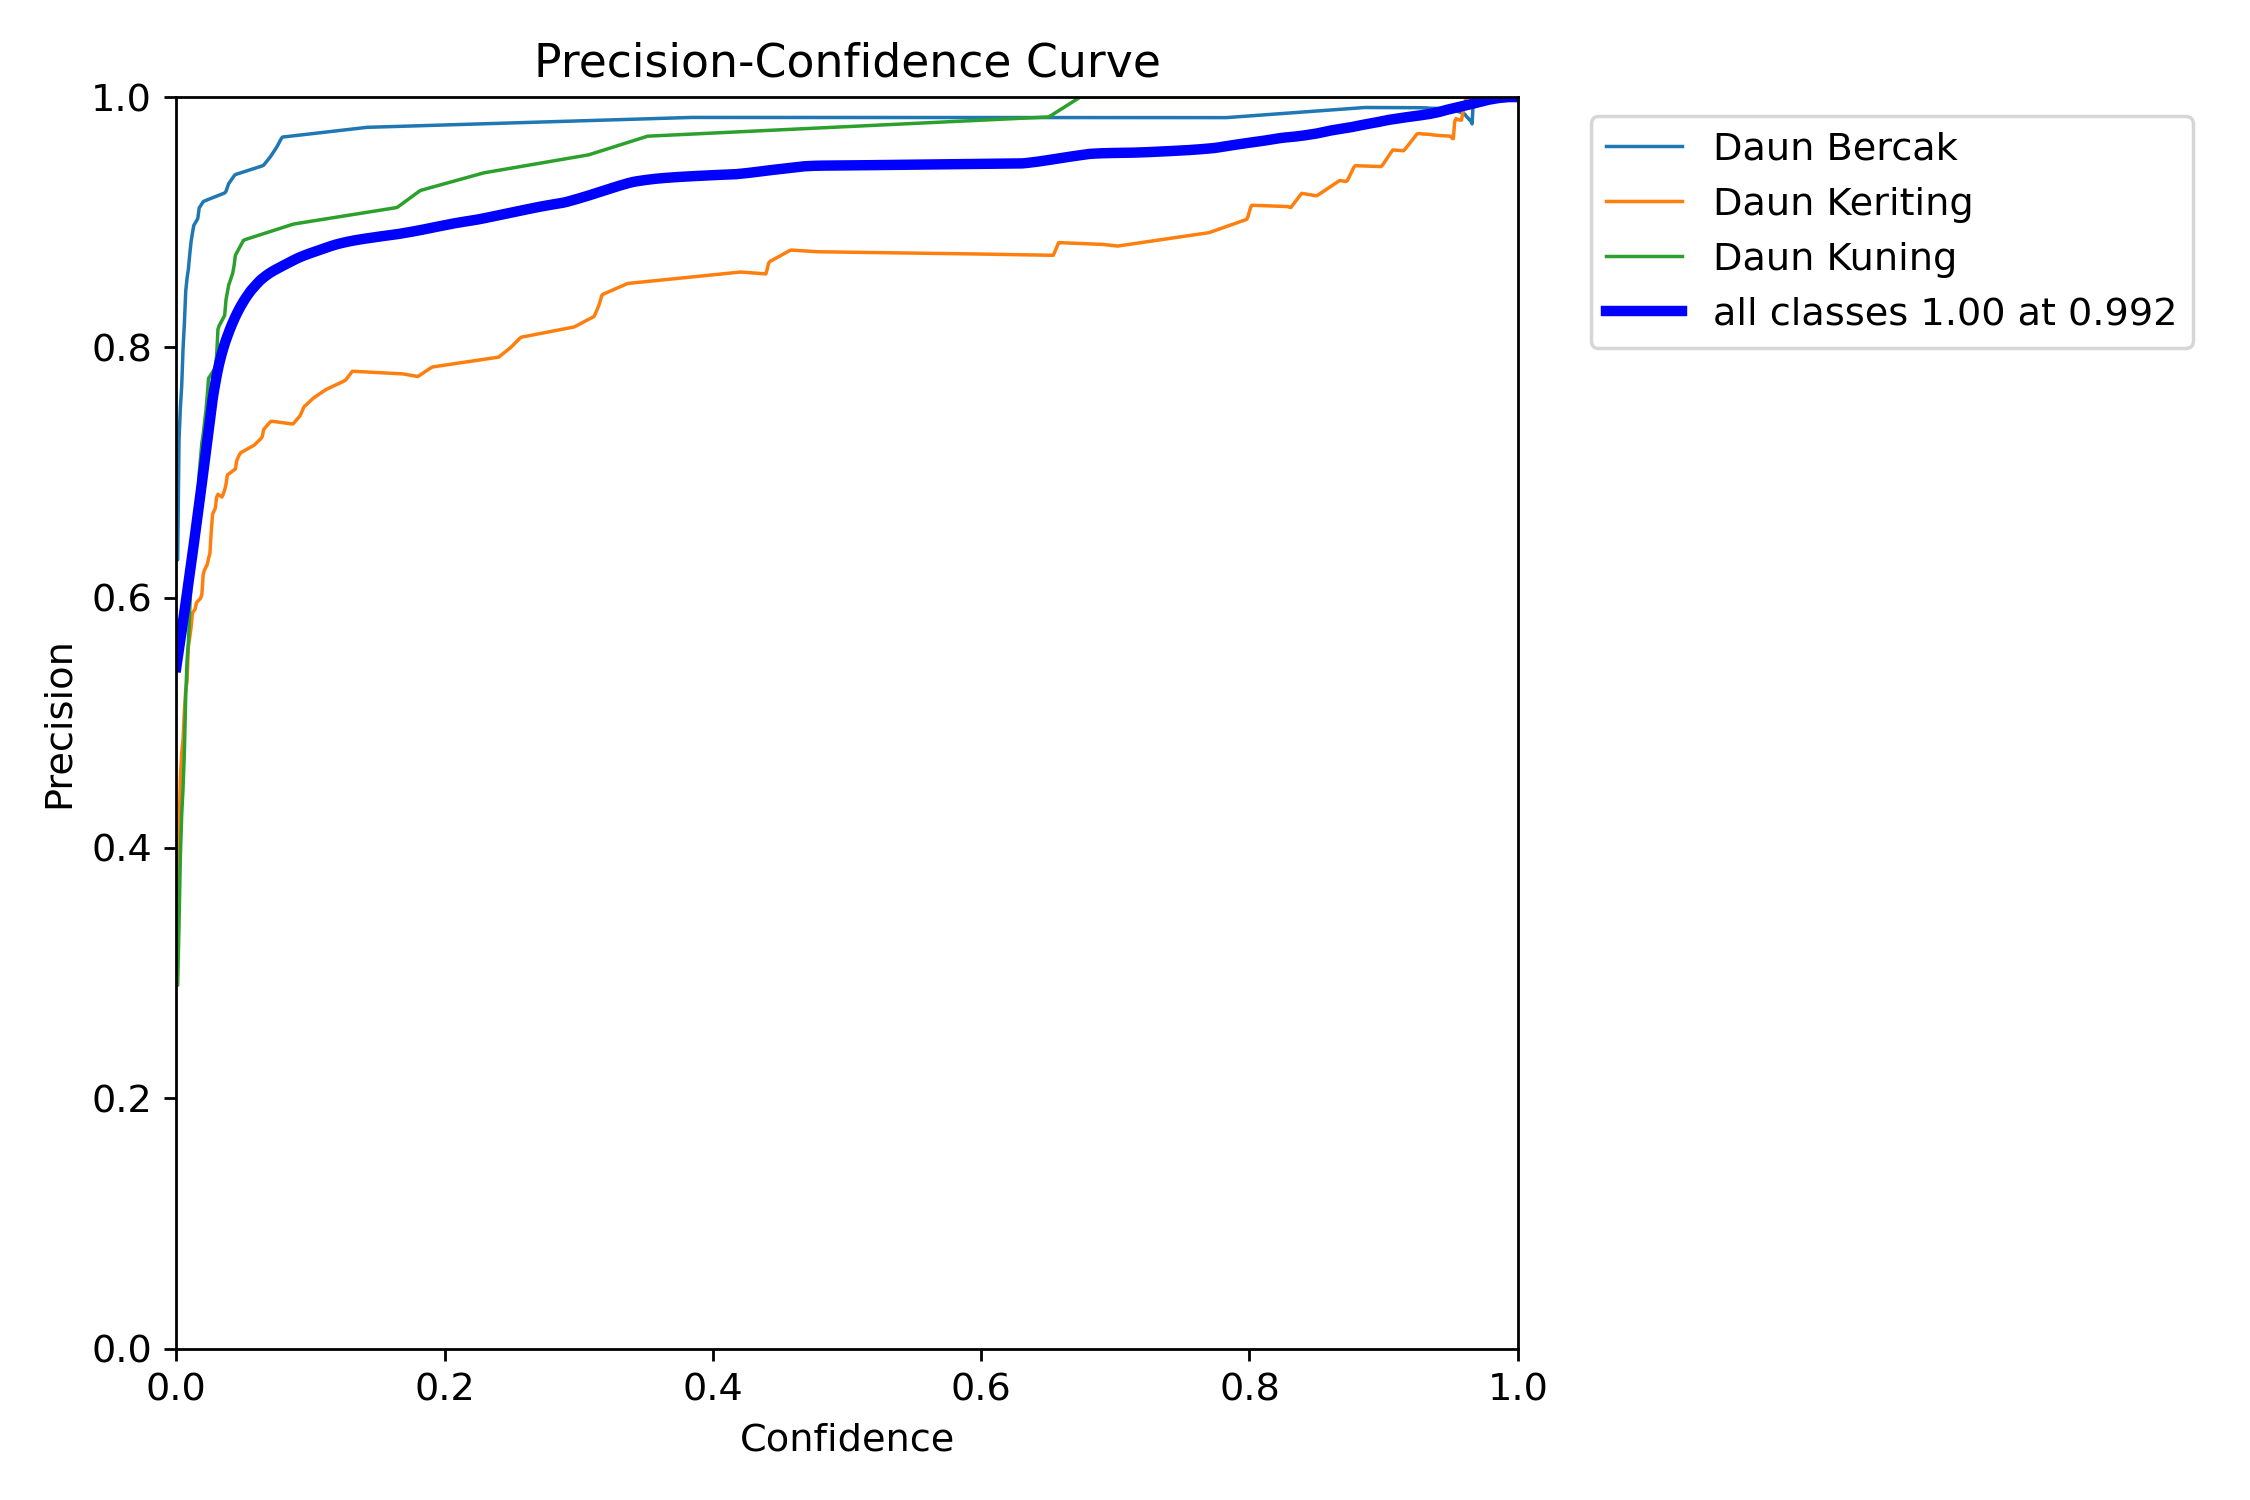

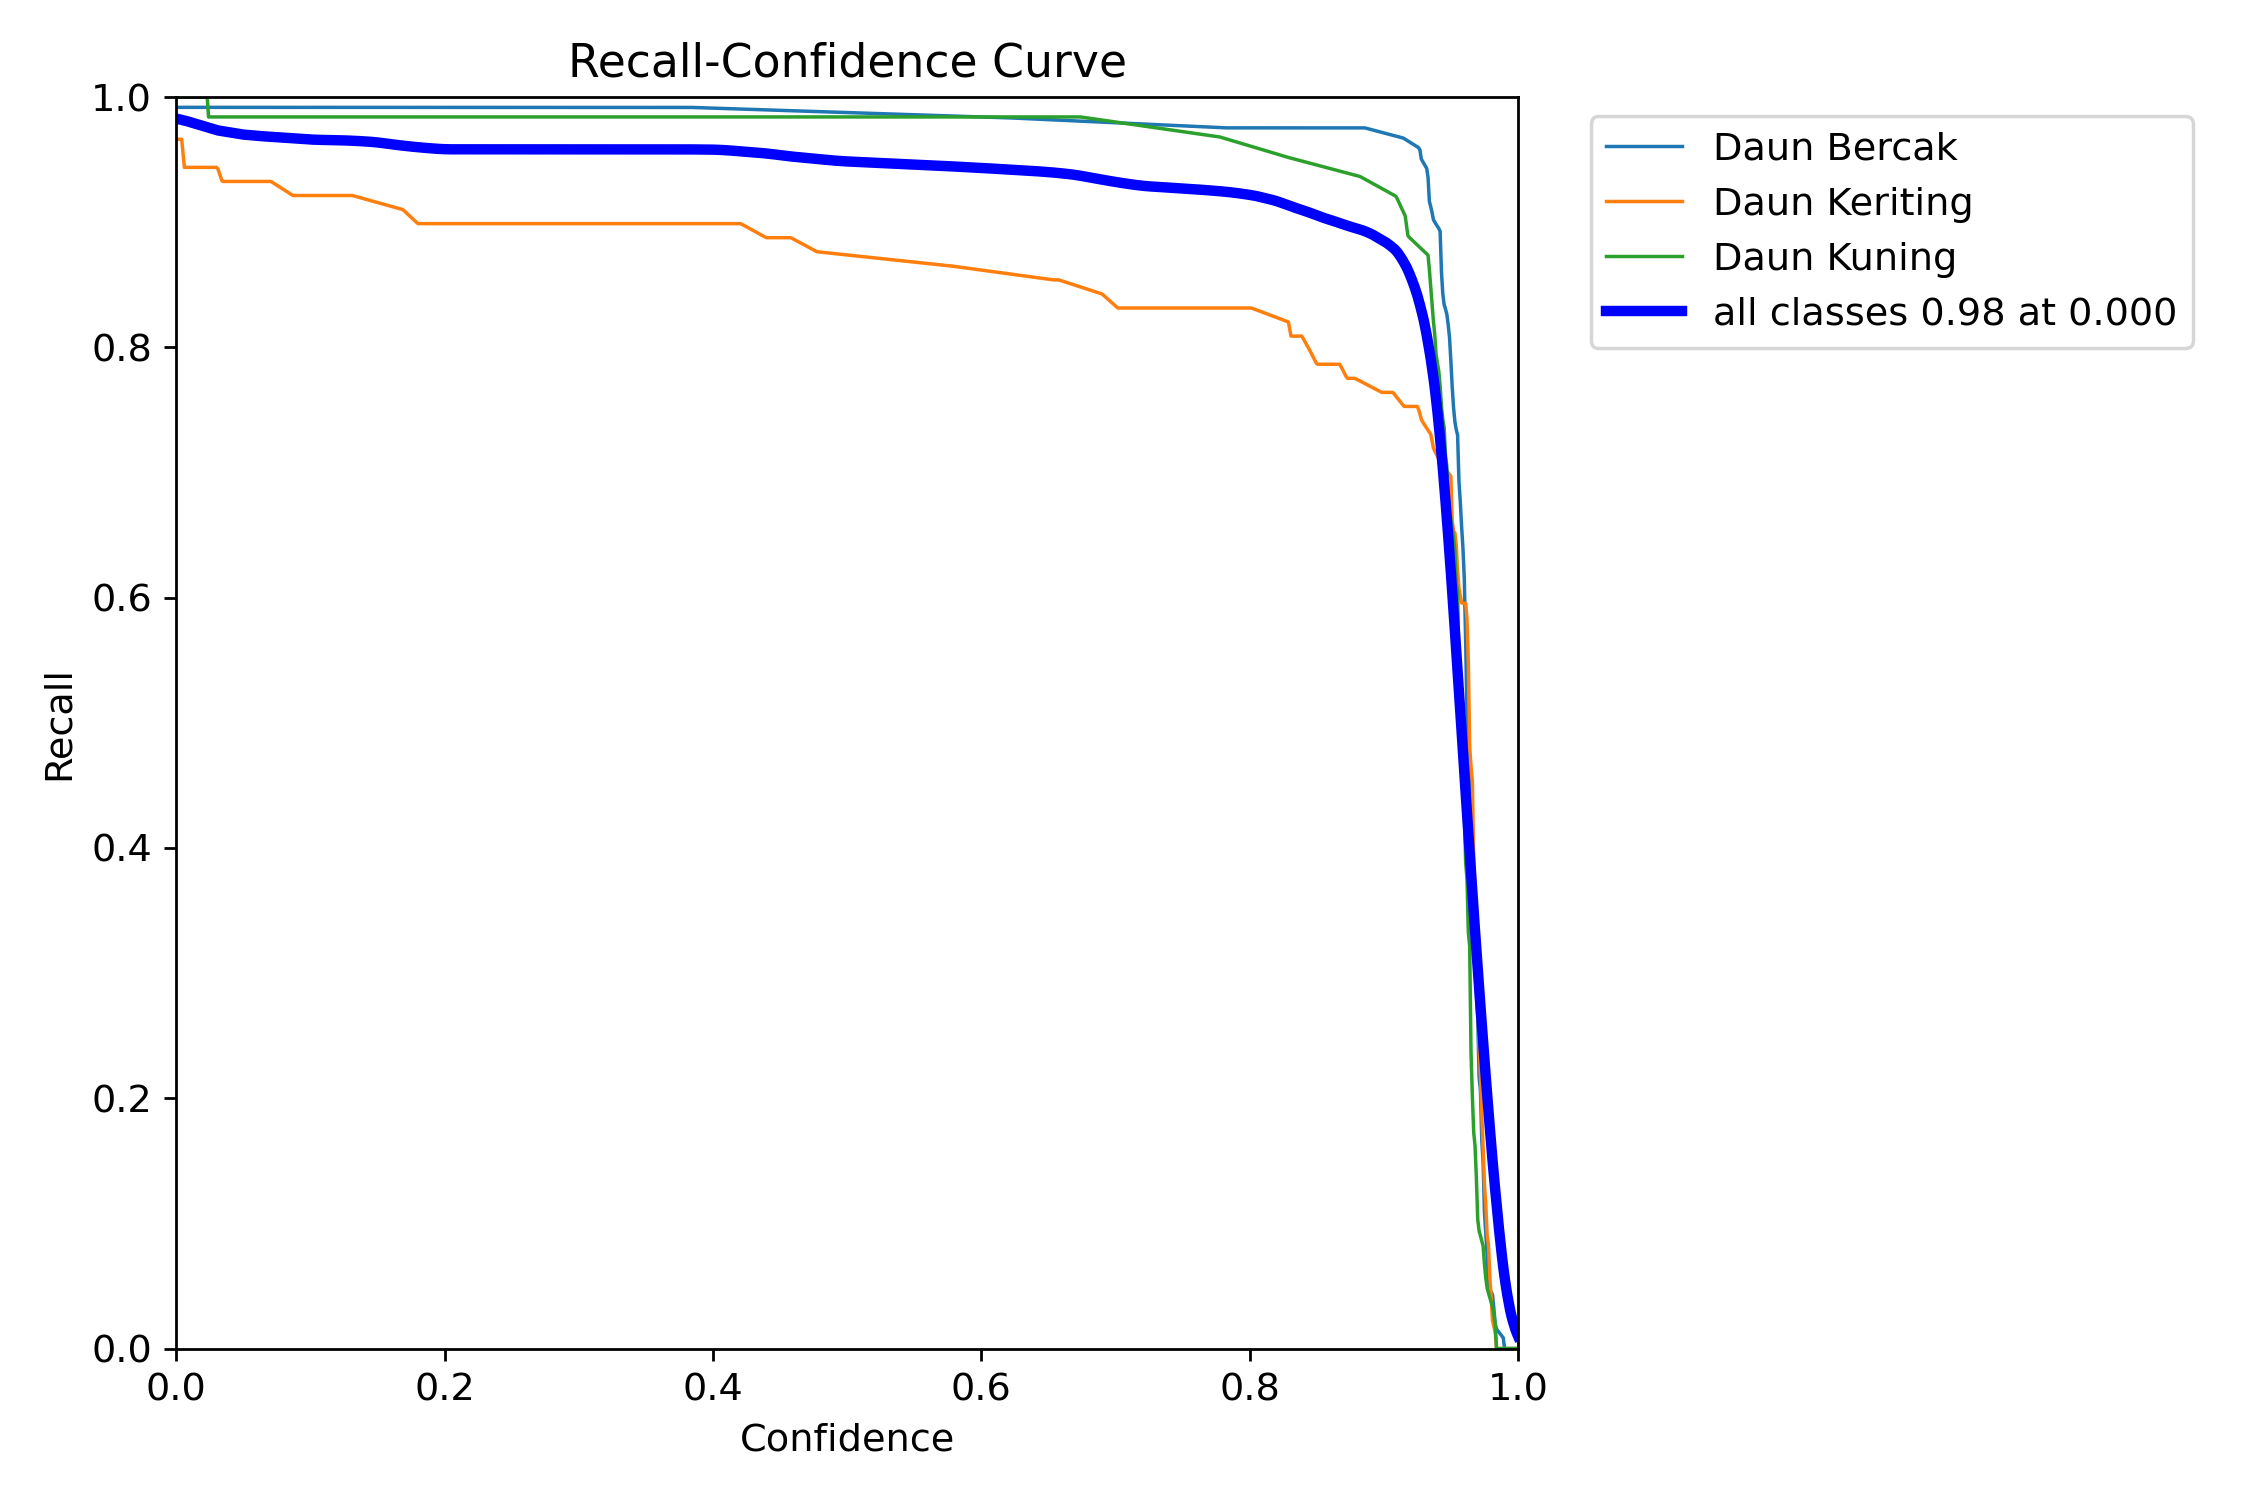

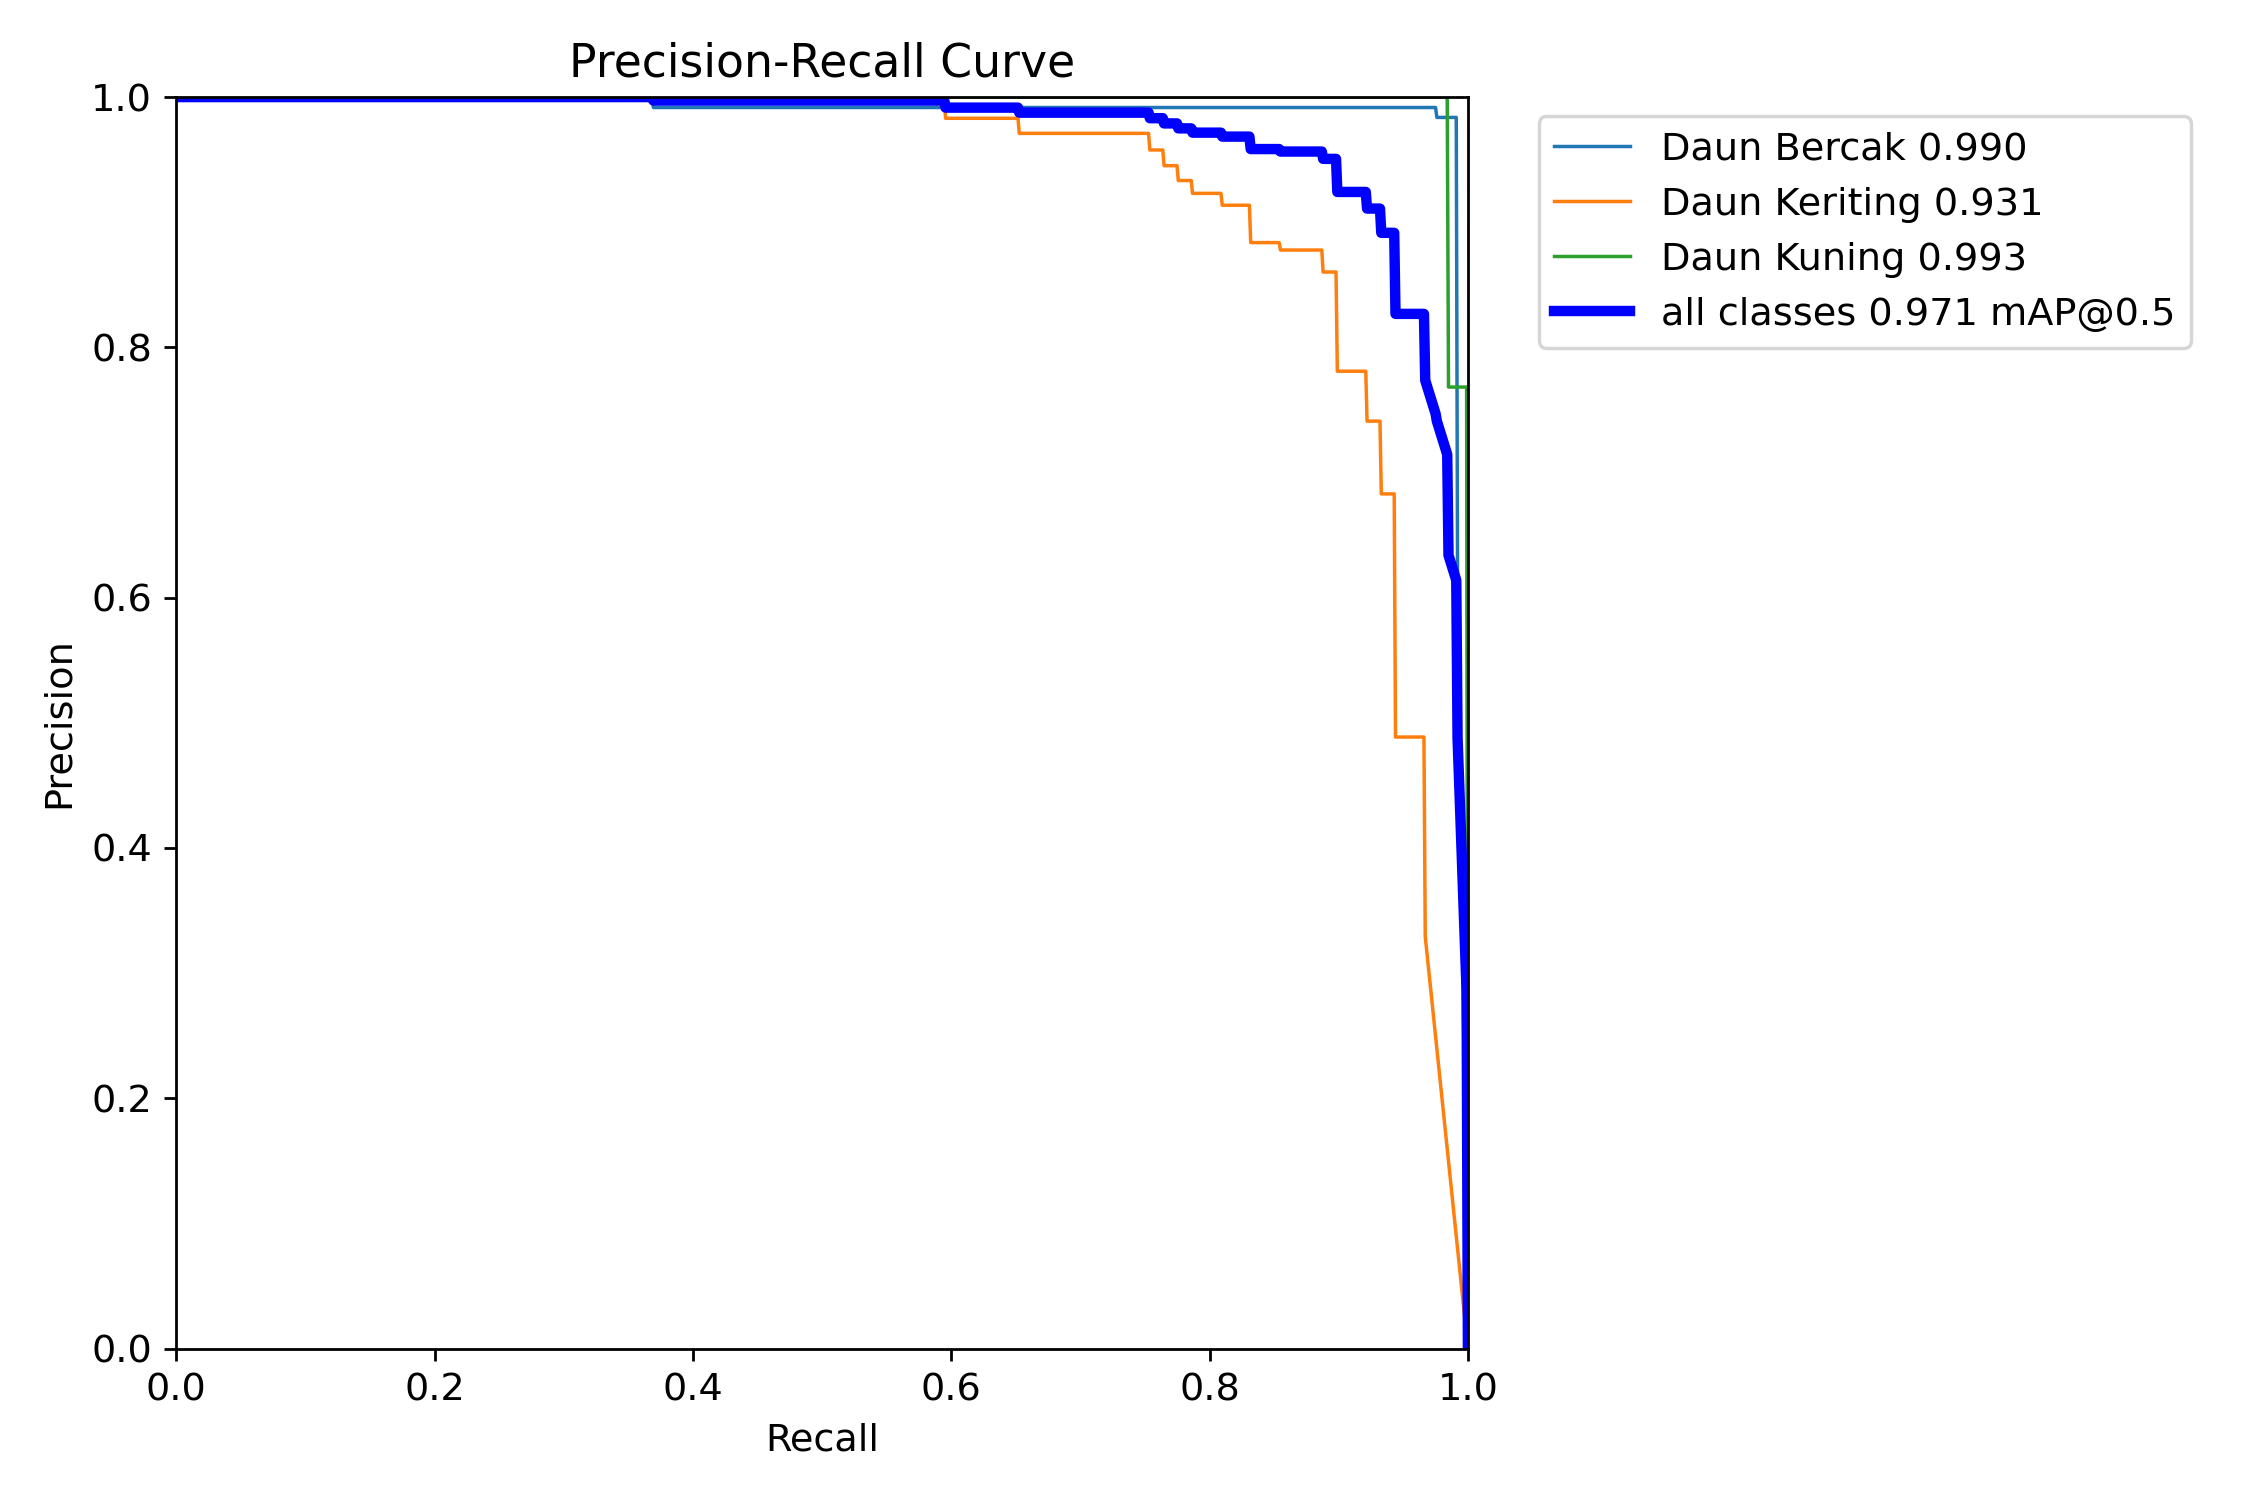

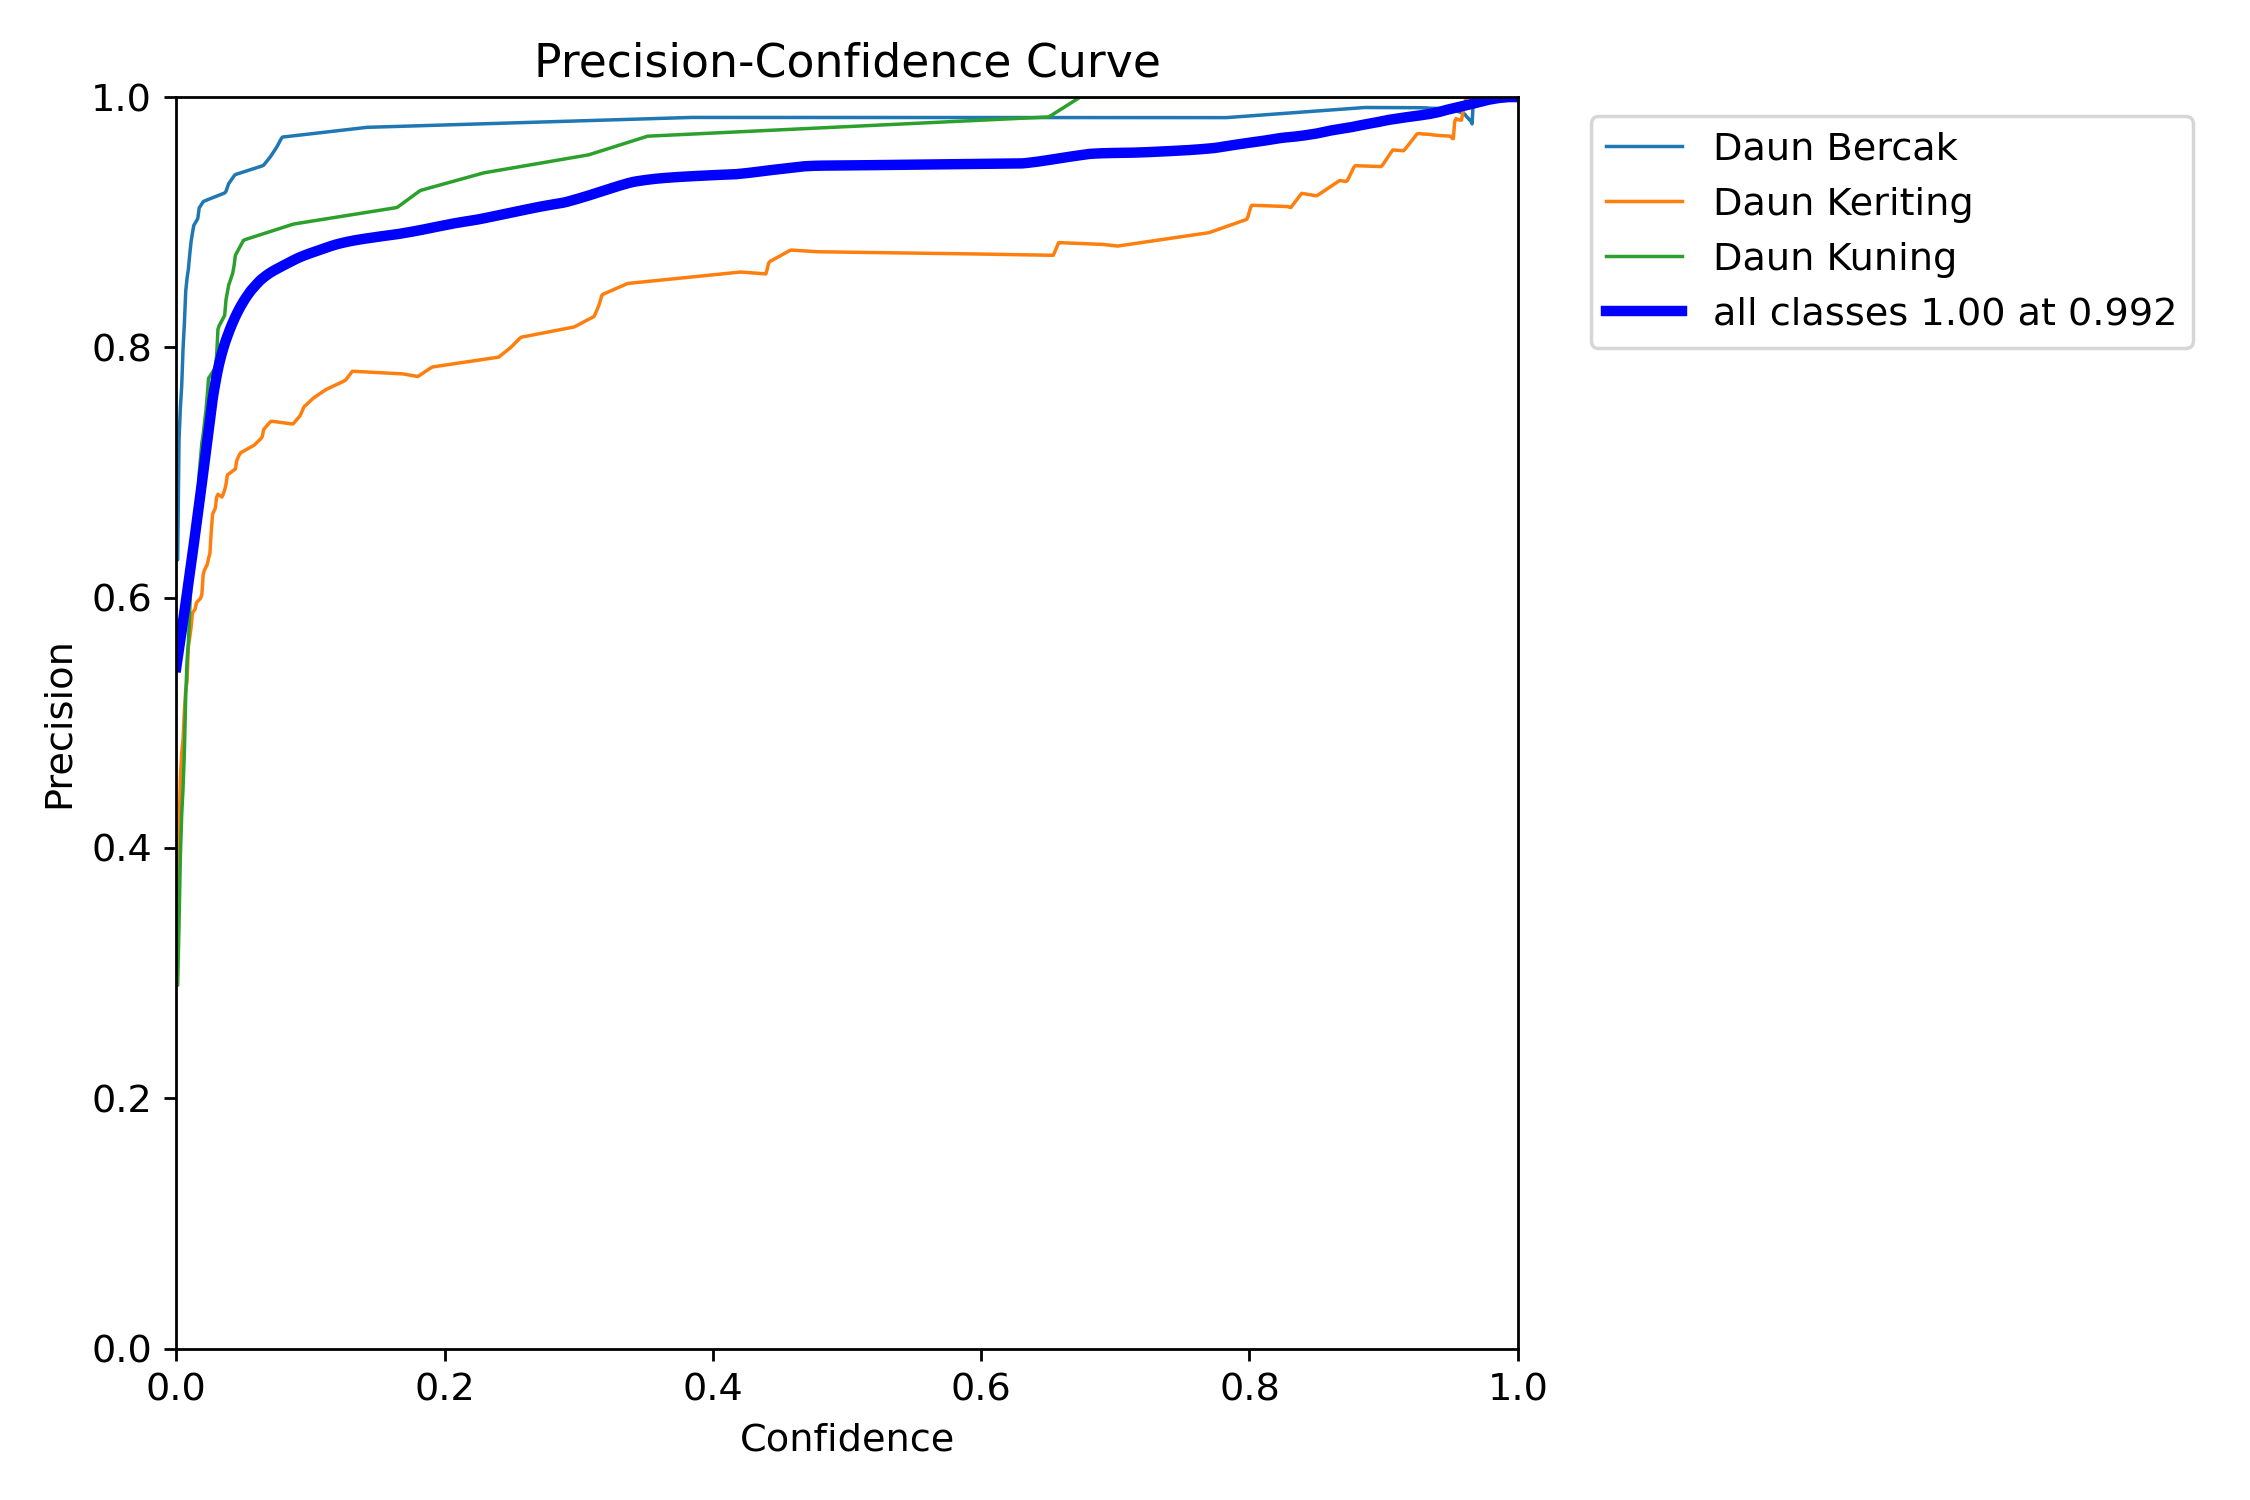

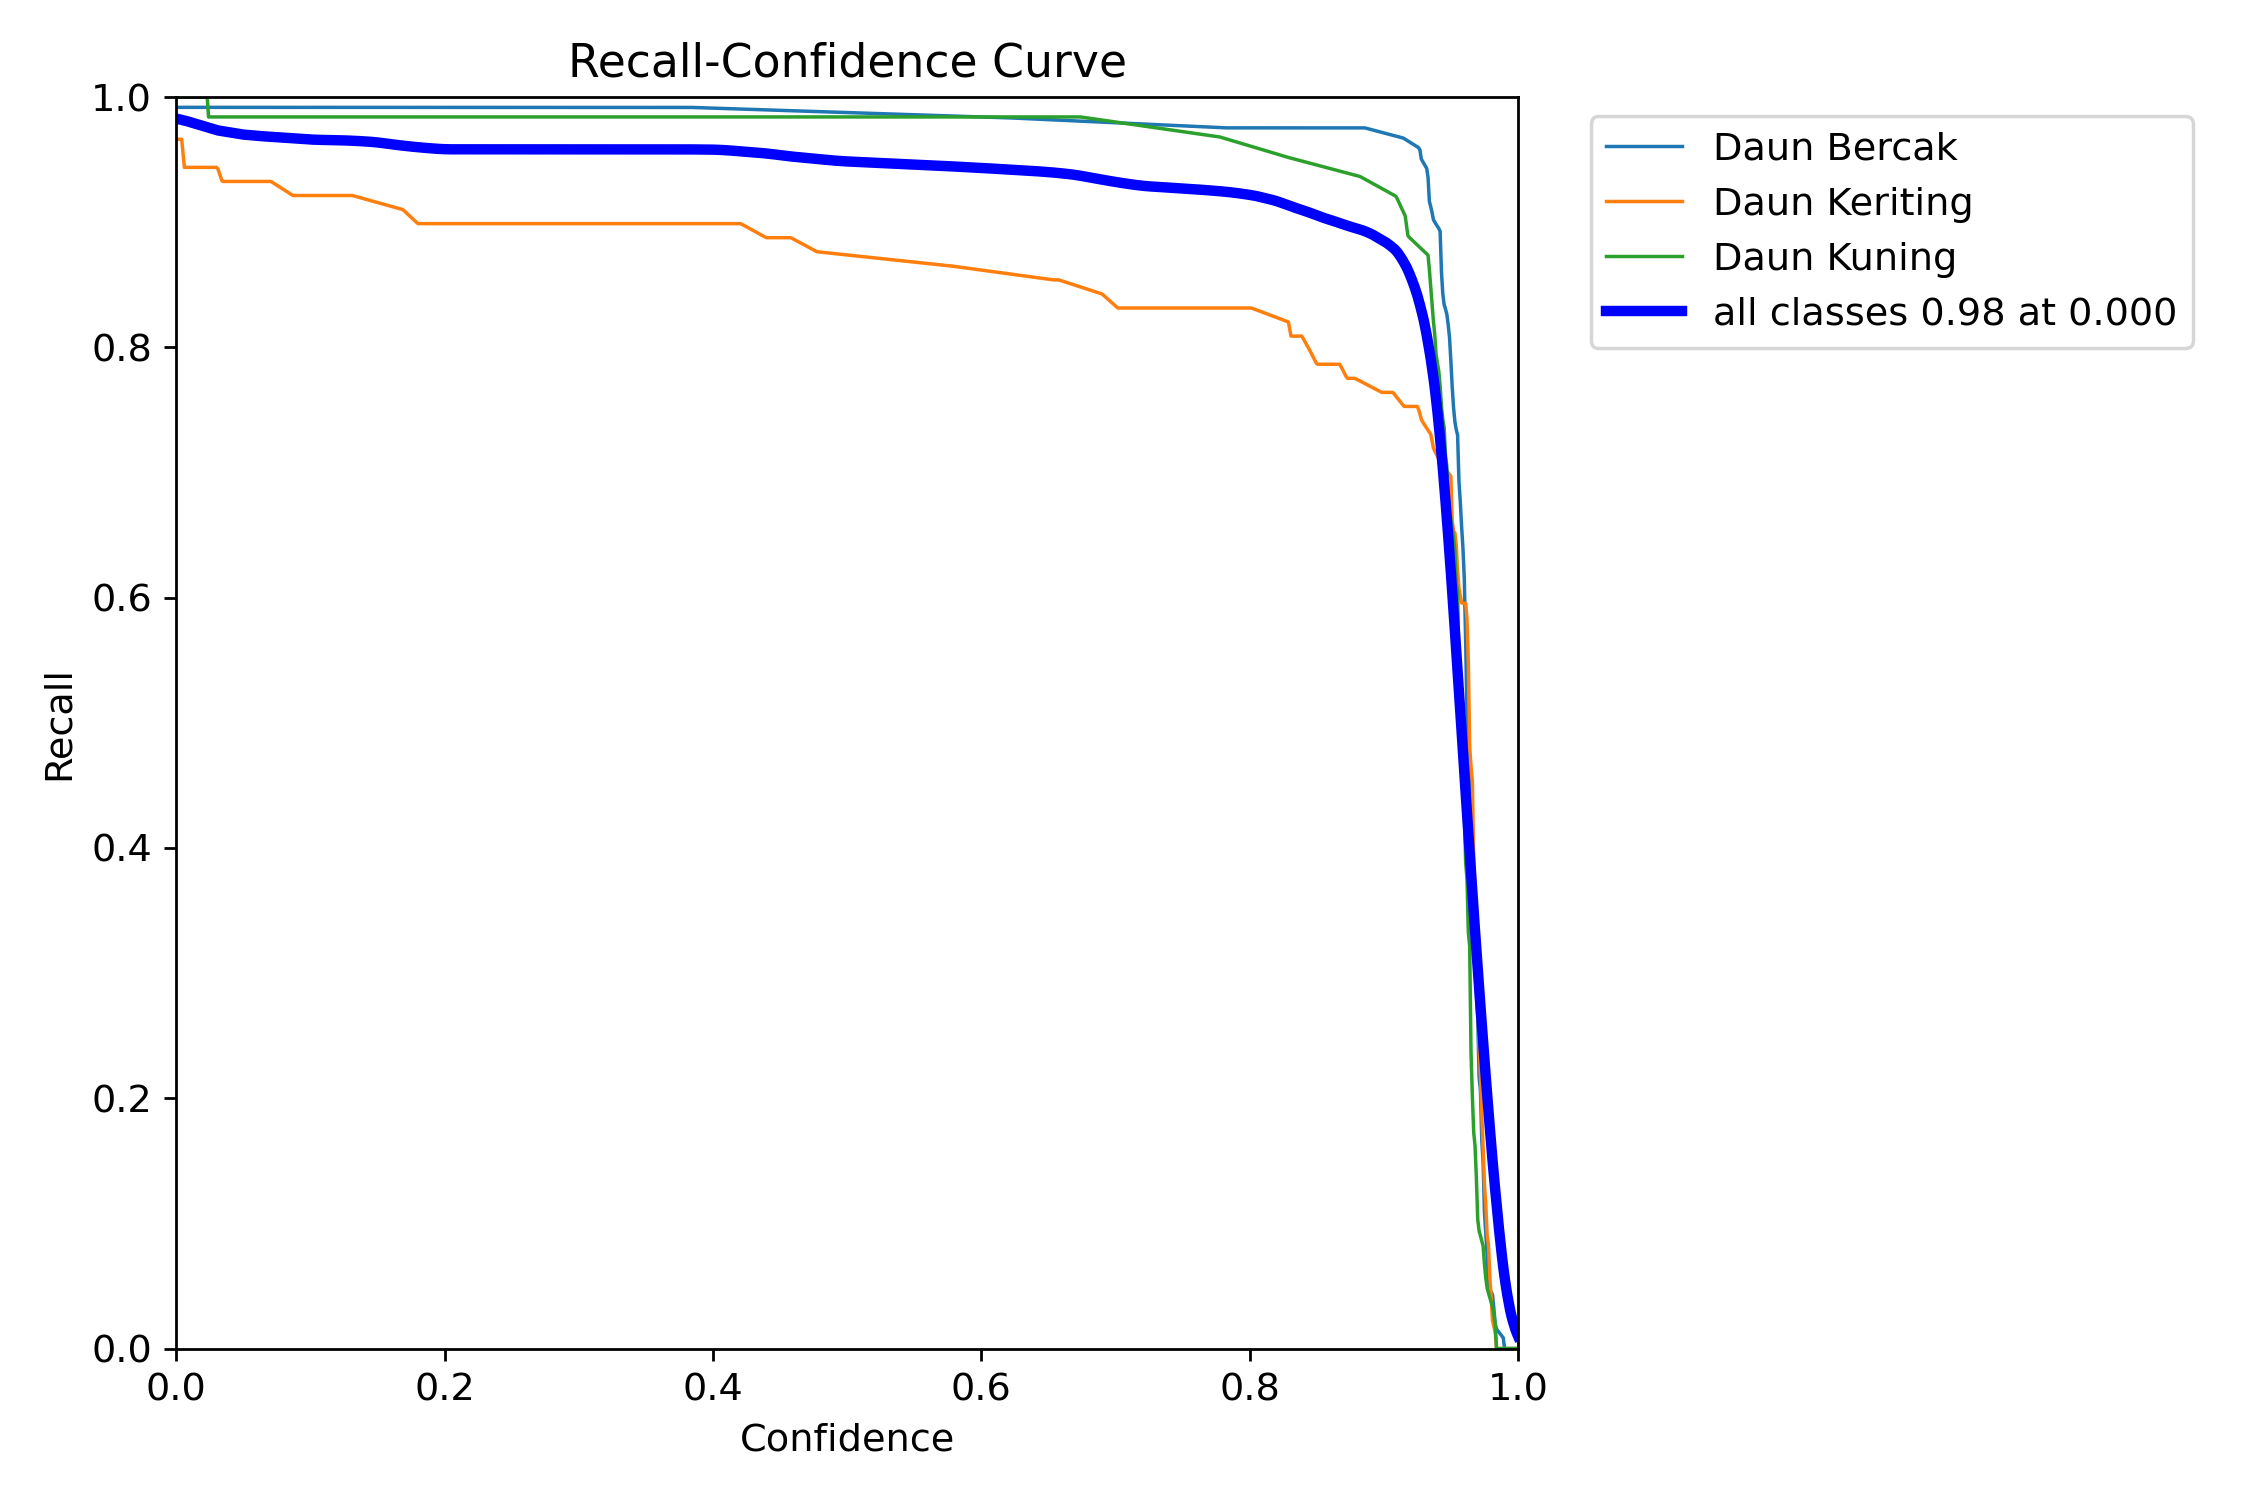

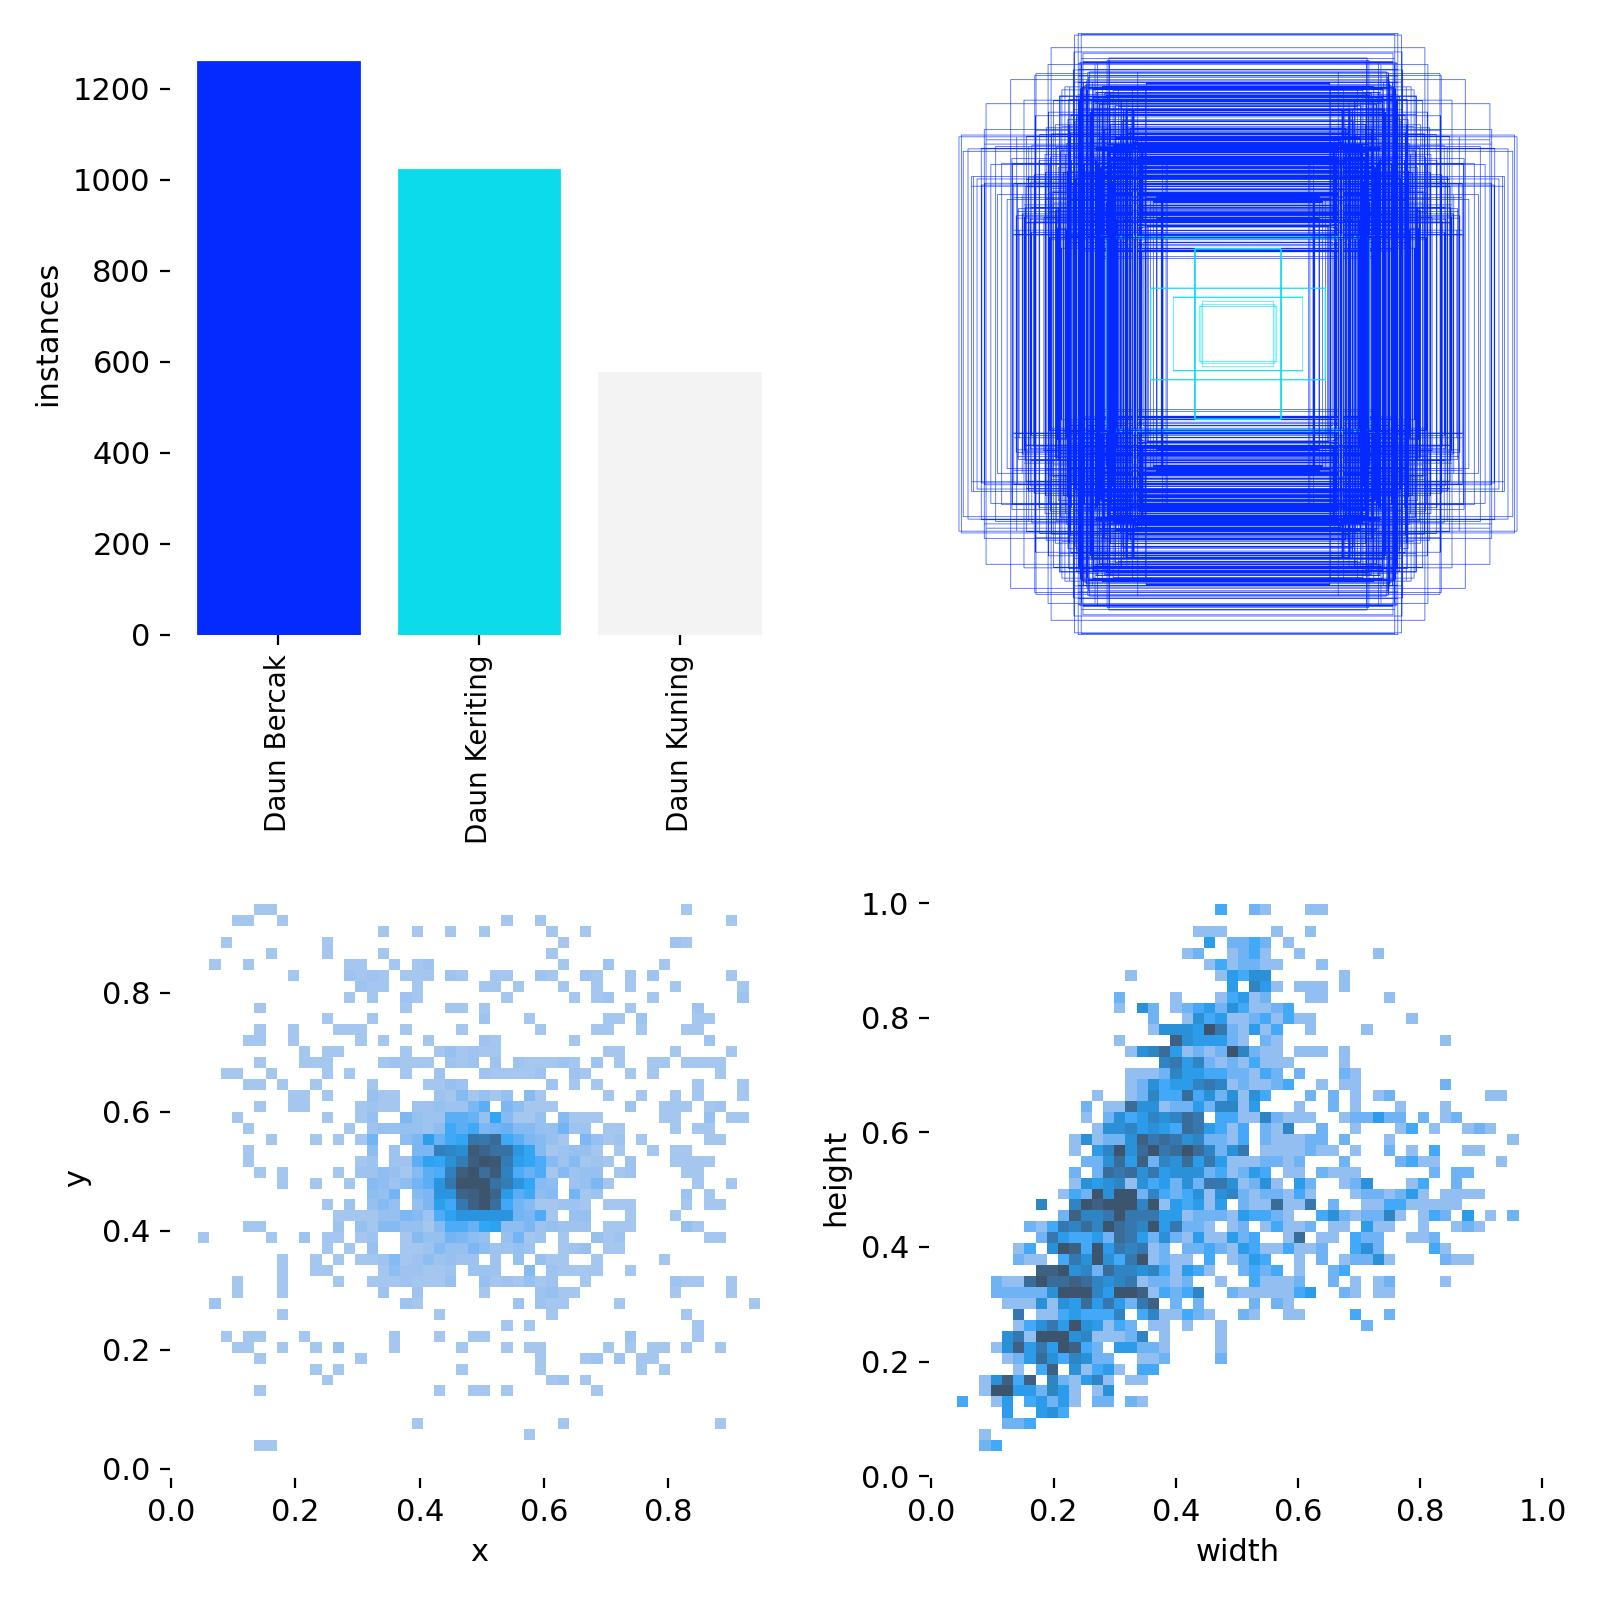

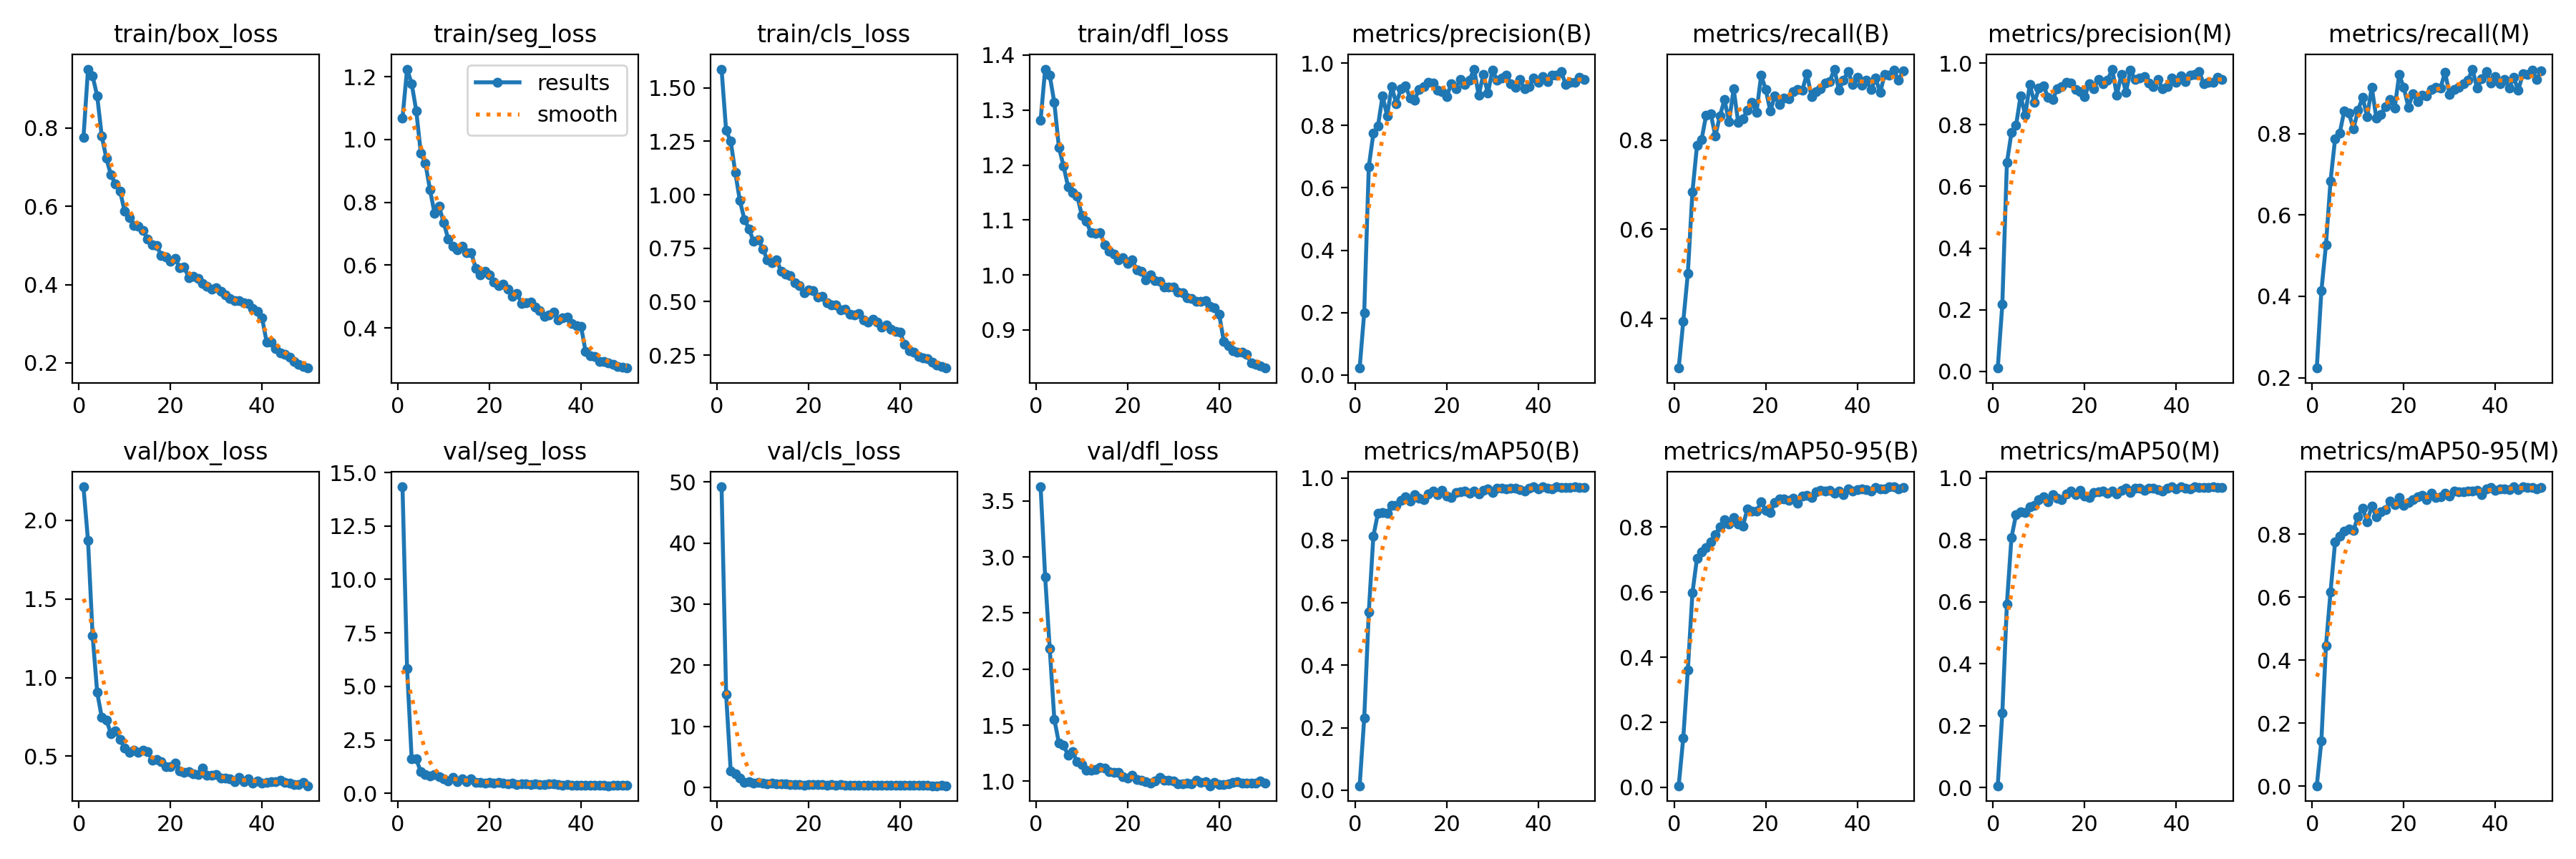

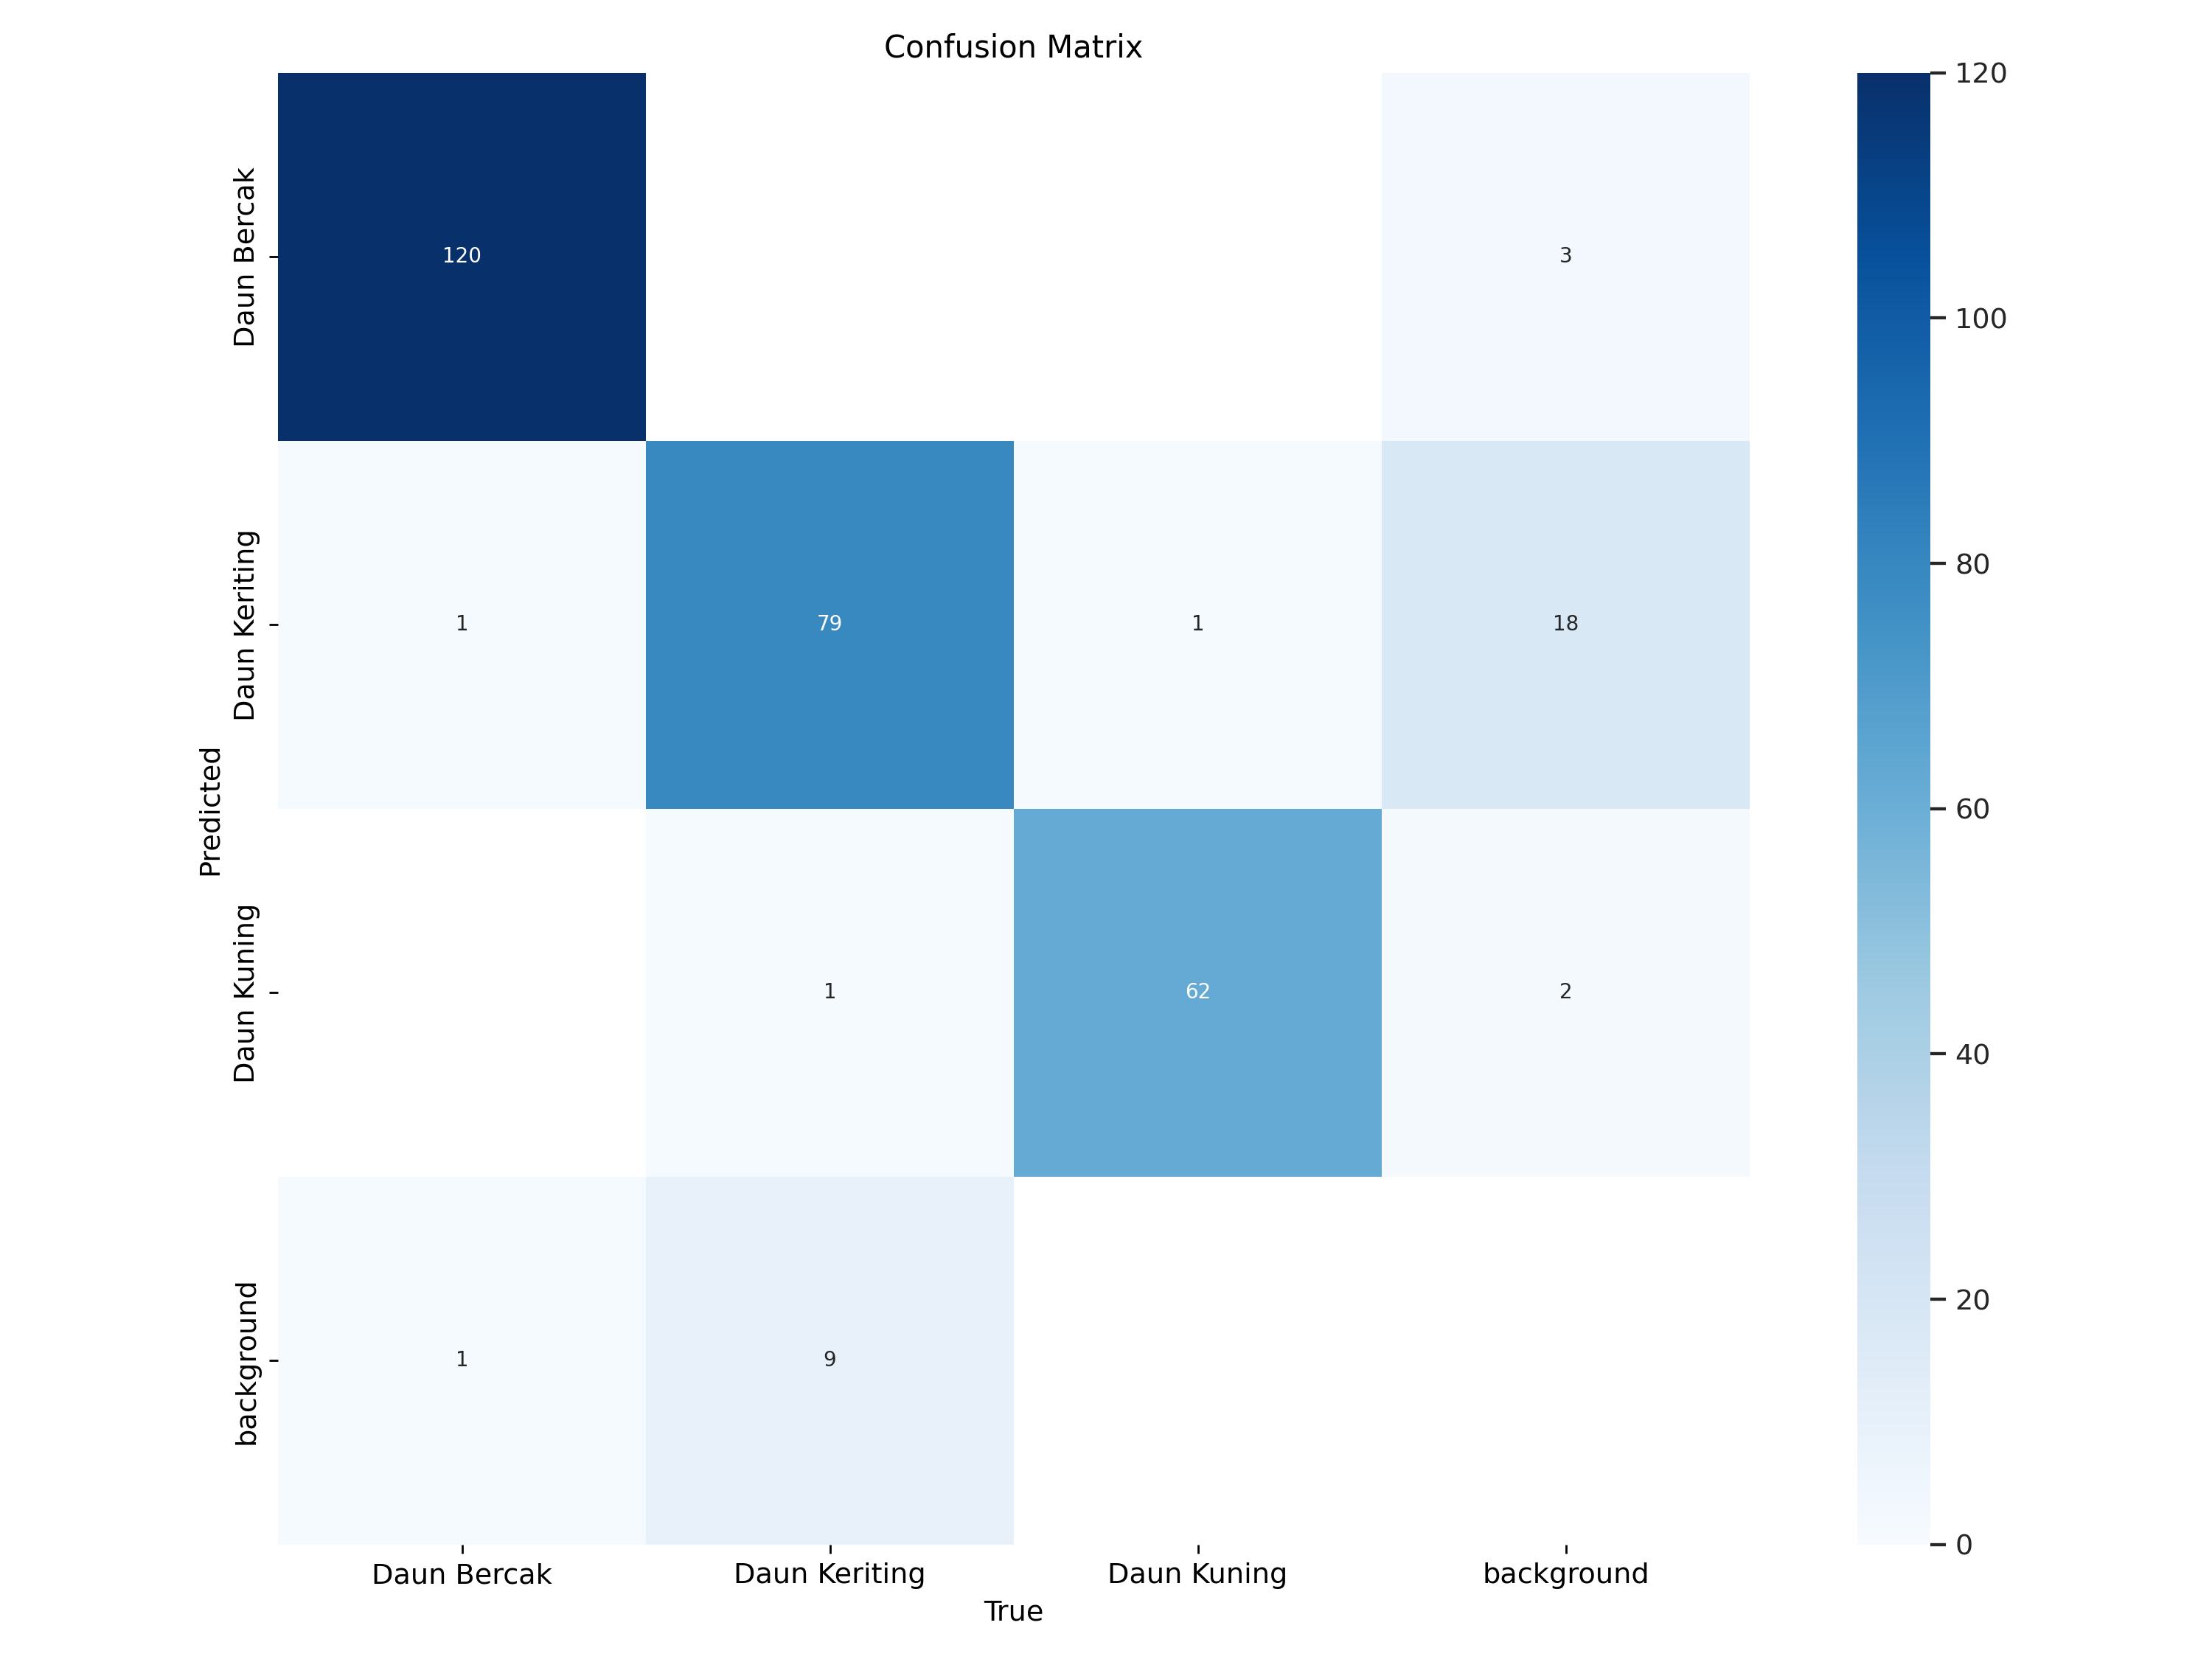

In [ ]:
image_paths = [
    "/content/runs/segment/train2/BoxF1_curve.png",
    "/content/runs/segment/train2/BoxPR_curve.png",
    "/content/runs/segment/train2/BoxP_curve.png",
    "/content/runs/segment/train2/BoxR_curve.png",
    "/content/runs/segment/train2/MaskPR_curve.png",
    "/content/runs/segment/train2/MaskP_curve.png",
    "/content/runs/segment/train2/MaskR_curve.png",
    "/content/runs/segment/train2/labels.jpg",
    "/content/runs/segment/train2/results.png",
    "/content/runs/segment/train2/confusion_matrix.png"
]

# Menampilkan semua gambar secara berurutan
for img_path in image_paths:
    display(Image(filename=img_path, height=600))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil
shutil.copytree("/content/runs/", "/content/drive/MyDrive/yolov9_segmentasi")

print("✅ Folder berhasil disalin ke Google Drive!")

✅ Folder berhasil disalin ke Google Drive!


In [ ]:
!pip install ai_edge_litert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 42.6 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/yolov9_segmentasi/segment/train2/weights/best.pt")

# Export the model to TFLite format
model.export(format="tflite")

Ultralytics 8.3.97 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
YOLOv9c-seg summary (fused): 169 layers, 27,626,841 parameters, 0 gradients, 157.6 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/yolov9_segmentasi/segment/train2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 39, 8400), (1, 32, 160, 160)) (53.6 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'onnx>=1.12.0', 'onnx2tf>=1.26.3', 'onnxslim>=0.1.31', 'tflite_support', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 190.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 207.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.4/446.4 kB 296.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━

100%|██████████| 1.11M/1.11M [00:00<00:00, 32.1MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 46.83file/s]


ONNX: starting export with onnx 1.16.1 opset 19...


ONNX: slimming with onnxslim 0.1.49...
ONNX: export success ✅ 6.3s, saved as '/content/drive/MyDrive/yolov9_segmentasi/segment/train2/weights/best.onnx' (105.8 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.27.1...
TensorFlow SavedModel: export success ✅ 243.4s, saved as '/content/drive/MyDrive/yolov9_segmentasi/segment/train2/weights/best_saved_model' (265.6 MB)

TensorFlow Lite: starting export with tensorflow 2.18.0...
TensorFlow Lite: export success ✅ 0.0s, saved as '/content/drive/MyDrive/yolov9_segmentasi/segment/train2/weights/best_saved_model/best_float32.tflite' (105.7 MB)

Export complete (249.2s)
Results saved to /content/drive/MyDrive/yolov9_segmentasi/segment/train2/weights
Predict:         yolo predict task=segment model=/content/drive/MyDrive/yolov9_segmentasi/segment/train2/weights/best_saved_model/best_float32.tflite imgsz=640  
Validate:        yolo val task=segment model=/content/drive/MyDrive/yolov9_segmentasi/segment/train2/weights/best_saved_mode

'/content/drive/MyDrive/yolov9_segmentasi/segment/train2/weights/best_saved_model/best_float32.tflite'